# Week 3: Introduction to Data Science 📈
# Tutorial

In the pre-module activity, you learned how to convert between csv data and a DataFrame. By now you should have a "clean" dataset called df_data_clean.csv after removing rows with missing values.

In this module you will learn how to:
1. Compute descriptive statistics using `describe()`
2. Analyze descriptive statistics for further data cleaning and initial observations
3. Split a dataset by predictor and target variables
4. Generate and interpret results of statistical analysis



---

##### **Q1. Complete the code below to load your clean dataset.**

<span style="background-color: #FFD700">**Write your code below**</span>

In [2]:
import pandas as pd
df = pd.read_csv("hf_data_pre_student.csv")

---

## Descriptive statistics with pandas
Descriptive statistics are a way to obtain a high-level summary of the data before we run algorithms or draw inference from it. This can include calculating the max/min/mean values of each numerical feature, and the distribution of data with lower/median/upper percentiles.

Without any knowledge of built-in Python or pandas functions that perform these calculations, you may calculate the maximum age using a loop, as you learned in weeks 1 and 2:

In [3]:
max_age = 0
for p_age in df['age']:
    if p_age > max_age:
        max_age = p_age
max_age

95.0

or now that you know the built-in max() function in Python, this can be reduced to one line.\

---

##### **Q2. Complete the code below to report the maximum age using the max() function.**

<span style="background-color: #FFD700">**Write your code below**</span>

In [4]:
# TODO: Write your code here
max_age = max(df['age'])
max_age

95.0

That wasn't too much code to write, but what about the maximum for all other columns? We could write a loop and call **max()** for every column:

In [5]:
for col in df.columns[1:]:
    print(df[col].max())

1
7861
107
80
1.0
850000.0
9.4
148
1
1.0
285
1


That still wasn't too bad, but what if we want to do this for every descriptive statistic (min, mean, standard deviation,...the list goes on)? Even if we use Python built-in functions whereever we can, it is cumbersome to write out code these *very commonly used* computations for every dataset we want to analyse. This is one of the motivations behind using the pandas library, which defines these functions for us. These functions are also highly tested, which reduces the likelihood of programming mistakes on our part. This allows us (and data scientists around the world) to redirect our time and effort into interpreting and understanding the dataset rather than crunching numbers or repeating basic code.

The DataFrame function **describe()** generates a table of descriptive statistics for each column in a dataset.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| describe() | n/a | Table of descriptive statistics on the DataFrame | df.describe() |



<span style="background-color: #FFD700">**Run the code below.**</span>

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,60.864897,0.431894,578.534884,0.770764,37.946844,0.348837,263477.258306,1.407542,136.621262,0.651163,0.318937,130.189369,0.318937
std,11.866863,0.496165,967.896470,6.163111,11.999049,0.477396,97500.567708,1.062022,4.398039,0.477396,0.466841,77.719929,0.466841
min,40.000000,0.000000,23.000000,0.000000,0.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,213000.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,249.000000,0.000000,38.000000,0.000000,262604.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303000.000000,1.400000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,7861.000000,107.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


Let's inspect these statistics. Part of our work as data scientists is to ensure the data is valid. What do we mean by valid? For example, if we generate this table of descriptive statistics and we see that the min age is -1, that is an obvious error in the dataset. Thankfully, everyone's age makes sense here: the patients are between the ages 40 to 95.

A few facts about the features, as presented in this paper:

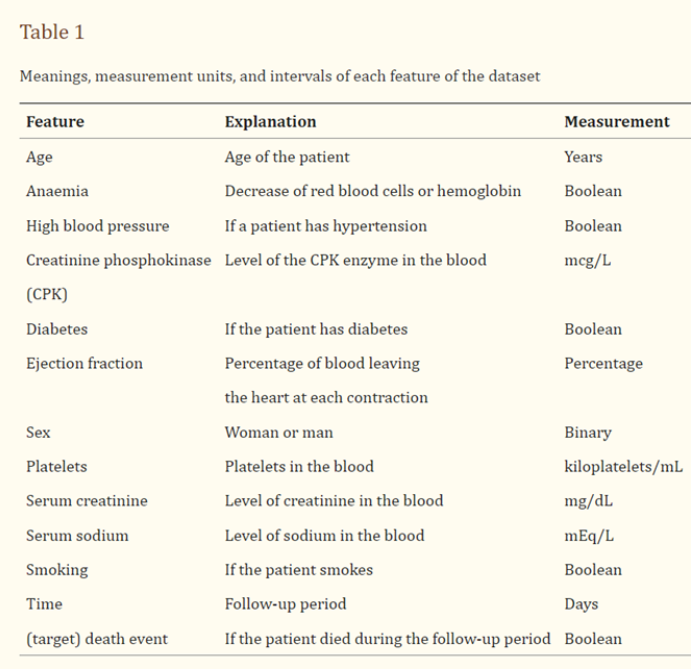

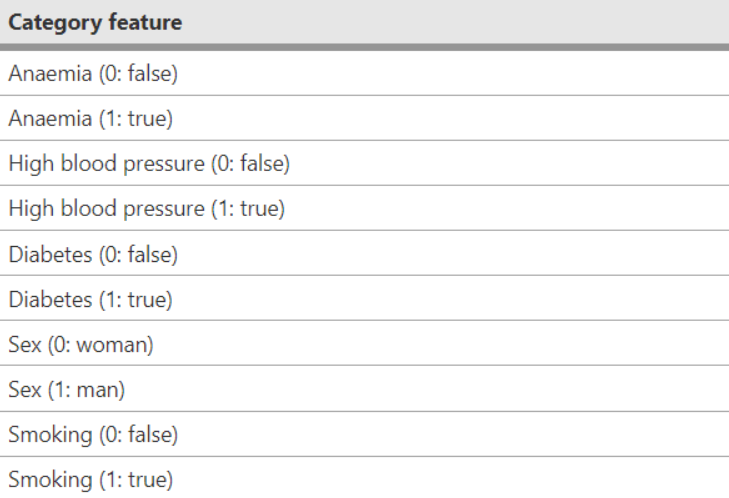

Note that some features were taken as binary measurements, like "diabetes" (0 indicating the patient DOES NOT have diabetes, 1 indicating that the patient DOES have diabetes). This follows the convention for binary values (boolean FALSE maps to 0 and boolean TRUE maps to 1). For other binary measurements that are encoded like "smoking" in this case, it is important to clearly note which boolean value maps to which binary value. In this case, the source states they have mapped "non-smokers" to 0 and "smokers" to 1.

Note that we are using a modified version of this dataset for our course.

\*Chicco, Davide, and Giuseppe Jurman. “Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone.” BMC medical informatics and decision making vol. 20,1 16. 3 Feb. 2020, doi:10.1186/s12911-020-1023-5

With these facts in mind, take a look at the the statistics. Does anything stand out to you? Does anything not match your expectations? It may be helpful to go through each statistic, feature by feature.


---

##### **Q3. What is potentially wrong with the "ejection fraction" column? (Hint: read about ejection fraction here https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement and here https://www.ncbi.nlm.nih.gov/books/NBK2218/, under "Diagnosis and Assessment")**
<span style="background-color: #FFD700">**Write your answer here**</span>

Answer: The potential issue with the 'ejection fraction' column is that it includes a minimum value of 0, which is highly unlikely in a living patient.  


---

##### **Q4. Is the max value reported above illogical for any of the columns?**

<span style="background-color: #FFD700">**Write your answer here**</span>

Answer: The max value for the diabetes column doesn't make sense as the column is boolean, so the max would have to be 1 and not any other numeric value.


---

Recall from the pre-module activity that we can use boolean indexing to return the subset of the DataFrame for which the boolean expression is true using a boolean list. We can create a boolean list of values in a column that satisfy a certain condition as follows:

```bool_mask = df[column_name] <boolean expression>```
For example, ```df['age'] < 80``` would return a boolean list of all values in the age column that are lower than 80.


---

##### **Q5. Using this technique, print and then drop the rows containing the suspicious ejection fraction in Question 3 and faulty value in Question 4 above.**

<span style="background-color: #FFD700">**Complete this exercise in code cells below.**</span>

In [7]:
# TODO: Print the row from Question 3.
bool_mask = df['ejection_fraction']==0 
df[bool_mask]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
29,61.0,1,62,0,0,0.0,262604.0,5.8,136,1,0.0,28,0


In [8]:
# TODO: Print the row from Question 4.
bool_mask= df['diabetes']>1
df[bool_mask]
# Just for fun: looking at this row and the values beside diabetes, what do you think happened when this data was collected?

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
234,70.0,0,107,107,35,0.0,300000.0,1.1,136,1,0.0,211,0


In [9]:
# TODO: Drop the rows from Question 3 and 4.
df = df.drop([29,234], axis=0)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1.0,265000.00,1.9,130,1,0.0,4,1
1,55.0,0,7861,0,38,0.0,263358.03,1.1,136,1,0.0,6,1
2,65.0,0,146,0,20,0.0,162000.00,1.3,129,1,1.0,7,1
3,50.0,1,111,0,20,0.0,210000.00,1.9,137,1,0.0,7,1
4,65.0,1,160,1,20,0.0,327000.00,2.7,116,0,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,62.0,0,61,1,38,1.0,155000.00,1.1,143,1,1.0,270,0
297,55.0,0,1820,0,38,0.0,270000.00,1.2,139,0,0.0,271,0
298,45.0,0,2060,1,60,0.0,742000.00,0.8,138,0,0.0,278,0
299,45.0,0,2413,0,38,0.0,140000.00,1.4,140,1,1.0,280,0


---

So far we've considered the rows in the DataFrame and removed those that don't make sense. What about the columns? Is every column a relevant risk factor for death?

You may have noticed the time column. When physicians collected data from their patients, they recorded the number of days after the initial patient visit until the next check-in (the follow-up period), at which point the physician recorded whether the patient has passed away or not. For our purpose, we will drop the time column from our analysis as this column was recorded for bookkeeping purposes, and it is clearly not to be considered a risk factor for death.


---

##### **Q6. You will notice that the follow-up period is not consistent across patients, likely due to constraints in physician/patient availabilities. What is the assumption we are making here by dropping the time column? Answer in the code cell below.**

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: The patient faced a complication/incident occurred of some sort which led them to follow-up with a physician. 


<span style="background-color: #FFD700">**Run the code below to drop the time column.**</span>

In [10]:
# drop the time column
df = df.drop(['time'], axis=1)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1.0,265000.00,1.9,130,1,0.0,1
1,55.0,0,7861,0,38,0.0,263358.03,1.1,136,1,0.0,1
2,65.0,0,146,0,20,0.0,162000.00,1.3,129,1,1.0,1
3,50.0,1,111,0,20,0.0,210000.00,1.9,137,1,0.0,1
4,65.0,1,160,1,20,0.0,327000.00,2.7,116,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,62.0,0,61,1,38,1.0,155000.00,1.1,143,1,1.0,0
297,55.0,0,1820,0,38,0.0,270000.00,1.2,139,0,0.0,0
298,45.0,0,2060,1,60,0.0,742000.00,0.8,138,0,0.0,0
299,45.0,0,2413,0,38,0.0,140000.00,1.4,140,1,1.0,0


---

After removing the two rows and the time column, your dataset df should now contain 299 rows and 12 columns.
Re-generate the descriptive statistics with the updated dataset and answer the questions below.

In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


---

##### **Q7. Are there more patients with high blood pressure or without high blood pressure in this dataset?**

<span style="background-color: #FFD700">**Write your answer here**</span>

Answer: There are more patients with high blood pressure than those without. Previously, the
mean was 0.348837, and now it is 0.351171, showing an increase in high blood pressure. 

---

##### **Q8. What is the median age of patients in this dataset?**

<span style="background-color: #FFD700">**Write your answer here**</span>

Answer: The median age of patients in this dataset is 60. 

---

## Splitting predictor/target variables
We have cleaned our dataset, examined some descriptive statistics, visualized the data, performed bivariate analysis, and made some observations along the way. At this point we can use statistical models (such as logistic regression) to determine which variables are risk factors to death. Although we will not go in depth on how to do the analysis, we will show and explain the results for you (see this week's Additional Exercises to learn more). First we must split the predictor variable(s) (the features of a patient that may contribute to death) and the target variable (the outcome we want to predict).

Let x be the columns including all predictor variables and let y be the target variable.

---

##### **Q9. Complete the code to assign the feature subset of df to x and the target column of df to y.**

Complete the code to assign the feature subset of df to x and the target column of df to y. Use the ```drop()``` function that we learned about to drop the columns you dont need and assign the rest to the variable. You may find this function useful to create a copy of a DataFrame: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

If you make a mistake and realize you modified ```df``` in a way you did not mean to, you can recover it to its prior state by re-running all the code cells before the cell with the mistake. See "Run All Above" in the task bar > Cell.

<span style="background-color: #FFD700">**Write your code below**</span>

In [12]:
# TODO: separate the predictor variables and target variable
x = df.drop(['DEATH_EVENT'], axis=1)

y = df['DEATH_EVENT'] 

print(x, y)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
296  62.0        0                        61         1                 38   
297  55.0        0                      1820         0                 38   
298  45.0        0                      2060         1                 60   
299  45.0        0                      2413         0                 38   
300  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

---

## Statistical analysis
Finally, to circle back to our goal of determining risk factors of death, we are going to apply a statistical model on our data. We will use logistic regression as this is a classification task (the outcome can be one of two predefined categories: death or no death).

<span style="background-color: #AFEEEE">**Classification task**</span>: a problem whose result (or output) is from a set of two or more predefined categories.

Here we will provide the code to do this analysis and explain the results for you. Here is a high-level overview of the steps in using a statistical model to determine which features are most relevant to the death outcome:
1. First, we obtain a logistic regression model from statsmodels, which is a Python library for statistical analysis.
2. Then, we fit the model to our data; the Logit model in statsmodels requires the target variable (y) and predictor variables (x) for this purpose. This is where parameters in the model equation are determined.

We print the result of this fitting to obtain statistics below. The first table printed shows us the statistics summary using functions from ```statsmodels```. The second table is generated by us after analysing the statistics and picking out the features with statistical significance and highest impact on the death outcome.

In [13]:
import numpy as np
import statsmodels.api as sm

# obtain and fit logistic regression model
logit_model=sm.Logit(y,x)
result=logit_model.fit()

print(result.summary2())

# Creating new data frame of p values
pvals = result.pvalues.T.to_frame()
pvals.index.name = 'Features'

# Creating new data frame of coefficients
coefs = result.params.T.to_frame()
coefs.index.name = 'Features'

# Merge into one data frame
results = pd.merge(coefs, pvals, how = "left", on = "Features",suffixes=("params","pvalues")).fillna(0).reset_index()
results = results.rename(columns={'0params':'Coef','0pvalues':'P-value'})

# Keep statistically significant features
final_results = results.loc[(results['P-value'] < 0.05)].reset_index(drop=True)

# Take exp of coefs to get odds
final_results['Odds'] = np.exp(final_results['Coef'])
# Calculate percent increase in odds
final_results['Percent Increase'] = (final_results['Odds'] - 1)*100
# Sort by odds
final_results = final_results.sort_values(by=['Odds'], ascending=False).reset_index(drop=True)
final_results

Optimization terminated successfully.
         Current function value: 0.494072
         Iterations 6
                             Results: Logit
Model:                 Logit              Method:             MLE       
Dependent Variable:    DEATH_EVENT        Pseudo R-squared:   0.213     
Date:                  2025-02-04 02:54   AIC:                317.4552  
No. Observations:      299                BIC:                358.1601  
Df Model:              10                 Log-Likelihood:     -147.73   
Df Residuals:          288                LL-Null:            -187.67   
Converged:             1.0000             LLR p-value:        5.2675e-13
No. Iterations:        6.0000             Scale:              1.0000    
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age                       0.0575   0.0130  4.4192 0

,Features,Coef,P-value,Odds,Percent Increase
0,serum_creatinine,0.699365,0.000066,2.012475,101.247512
1,age,0.057537,0.000010,1.059224,5.922420
2,creatinine_phosphokinase,0.000282,0.047620,1.000282,0.028185
3,serum_sodium,-0.021686,0.004251,0.978547,-2.145268
4,ejection_fraction,-0.071023,0.000002,0.931441,-6.855928


---

##### **Q10. From the graph, let's see if you can find the following information. Which variable showed the strongest negative relationship with the dependent variable and how can you tell?**

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: Ejection fraction since the coefficient is -0.071023, which is the highest negative value
there is.

---

## Conclusion

In this module you have learned how to:
1. Compute descriptive statistics using **describe()**
2. Analyze descriptive statistics for further data cleaning and initial observations
3. Split a dataset by predictor and target variables
4. Generate and interpret results of statistical analysis

## Further Reading
* Histogram plotting documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
* Seaborn heatmap documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html